In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
df['o2sat']=pd.read_csv("o2saturation.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2sat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [131]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2sat
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [132]:
df.shape

(303, 15)

In [133]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2sat'],
      dtype='object')

In [134]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
o2sat       0
dtype: int64

In [135]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
o2sat       float64
dtype: object

In [136]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
o2sat         7
dtype: int64

In [137]:
import numpy as np
df.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2sat
output,,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,97.363768
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,97.578788


From above table we can draw following conclusions:
1. caa is relatively low for people who are proned to get heart attack
2. oldpeak is relatively low for people who are proned to get heart attack
3. thalachh is relatively high for people who are proned to get heart attack
4. chol is relatively low for people who are proned to get heart attack
5. trtbps is relatively low for people who are proned to get heart attack
6. cp is relatively high for people who are proned to get heart attack
7. age is relatively low for people who are proned to get heart attack

hence we only consider these variables as or predictor varibles 
the remaining varibles doesn't show significant changes with respect to each other 

In [138]:
print("Predictor variables: [caa,oldpeak,thalachh,chol,trtbps,cp,age]")
print("Response variable:[output]")

Predictor variables: [caa,oldpeak,thalachh,chol,trtbps,cp,age]
Response variable:[output]


In [139]:
X=df.drop(['fbs','restecg','slp','thall','o2sat','sex','exng','output'],axis='columns')
y=df.output

In [140]:
print("X_shape=",X.shape)
print("y_shape=",y.shape)

X_shape= (303, 7)
y_shape= (303,)


In [141]:
def print_shape(split,X_train,X_test,y_train,y_test):
    print("For",split,"ratio split:")
    print("X_train=",X_train.shape)
    print("X_test=",X_test.shape)
    print("y_train=",y_train.shape)
    print("y_test=",y_test.shape)

In [142]:
from sklearn.metrics import accuracy_score
def get_score(model,X_train,X_test,y_train,y_test,t_value):
    model.fit(X_train,y_train)
    probs=model.predict_proba(X_test)
    y_pred=np.where(probs[:,1]>=t_value,1,0)
    return accuracy_score(y_test,y_pred)

In [143]:
from sklearn.metrics import confusion_matrix
def conf_mat(model,X_train,X_test,y_train,y_test,t_value):
    model.fit(X_train,y_train)
    probs=model.predict_proba(X_test)
    y_pred=np.where(probs[:,1]>=t_value,1,0)
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(7,5))
    sn.heatmap(cm,annot=True)
    plt.xlabel('predicted')
    plt.ylabel('truth')

In [144]:
from sklearn.metrics import classification_report
def clasf_repo(model,X_train,X_test,y_train,y_test,t_value):
    model.fit(X_train,y_train)
    probs=model.predict_proba(X_test)
    y_pred=np.where(probs[:,1]>=t_value,1,0)
    print(classification_report(y_test,y_pred))

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go
def roc_auc(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)
    model.fit(X_train,y_train)
    probs=model.predict_proba(X_test)[:,1]
    fpr_1, tpr_1, thresholds= roc_curve(y_test, probs)
    auc_1 = roc_auc_score(y_test, probs)

    #generate a trace for ROC curve
    trace0=go.Scatter(
        x=fpr_1,
        y=tpr_1,
        mode='lines',
        name=f'{model} (Area = {auc_1:.2f})'
    )

    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
    model.fit(X_train,y_train)
    probs=model.predict_proba(X_test)[:,1]
    fpr_2, tpr_2, thresholds= roc_curve(y_test, probs)
    auc_2 = roc_auc_score(y_test, probs)

    #generate a trace for ROC curve
    trace1=go.Scatter(
        x=fpr_2,
        y=tpr_2,
        mode='lines',
        name=f'{model} (Area = {auc_2:.2f})'
    )

    #Diagonal line
    trace2=go.Scatter(
        x=[0,1],
        y=[0,1],
        mode='lines',
        name='Random (Area = 0.5)',
        line=dict(dash='dash')
    )

    data=[trace0,trace1,trace2]

    #define layout with square aspect ratio
    layout=go.Layout(
        title='Receiver Operating Charateristics',
        xaxis=dict(title='False Positive Rate'),
        yaxis=dict(title='True Positive Rate'),
        autosize=False,
        width=800,
        height=800,
        showlegend=True
    )

    #define figure and add data
    fig=go.Figure(data=data,layout=layout)

    #show figure
    fig.show()

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
def study(model,X,y):
    features_score=[]
    df=pd.DataFrame(columns=X.columns)
    for feature in X.columns:
        x=X[[feature]]
        X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)
        model.fit(X_train,y_train)
        probs=model.predict_proba(X_test)
        y_pred=np.where(probs[:,1]>=0.5,1,0)
        features_score.append([accuracy_score(y_test,y_pred),feature])
        
    c=1
    features_score.sort(reverse=True)
    print("Most Dominated Feature=",features_score[0][1],'\n')
    for i in features_score:
        print("Rank",c,":",i[1],", accuracy=",i[0])
        c=c+1 

In [147]:
import matplotlib.patches as mpatches
def graph(model,X,y):
    t_value=[0.5,0.6]
    split=[0.7,0.8]
    x_axis=np.arange(4)
    x_label=['70:30(thr=0.5)','70:30(thr=0.6)','80:20(thr=0.5)','80:20(thr=0.6)']
    df=pd.DataFrame(columns=x_label)
    y_axis=[]
    c=0
    for i in split:
        X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=i,random_state=10)
        model.fit(X_train,y_train)
        probs=model.predict_proba(X_test)[:,1]
        for j in t_value:
            y_pred=np.where(probs>=j,1,0)
            perf_mat=[]
            perf_mat.append(accuracy_score(y_test,y_pred))
            y_axis.append(accuracy_score(y_test,y_pred))
            perf_mat.append(precision_score(y_test,y_pred))
            perf_mat.append(recall_score(y_test,y_pred))
            perf_mat.append(f1_score(y_test,y_pred))
            perf_mat.append(roc_auc_score(y_test,y_pred))
            perf_mat.append(mean_absolute_error(y_test,y_pred))
            perf_mat.append(mean_squared_error(y_test,y_pred))
            perf_mat.append(np.sqrt(mean_squared_error(y_test,y_pred)))
            perf_mat.append(r2_score(y_test,y_pred))
            for i in confusion_matrix(y_test,y_pred):
                perf_mat.append(i)
            df[x_label[c]]=pd.Series(perf_mat)
            c=c+1
    df.index=['accuracy','precision','recall','f1','roc_auc','mae','mse','rmse','r2','confusion','matrix']
    
    print(df)

    colors = ['blue' if i != np.argmax(y_axis) else 'red' for i in range(len(y_axis))]
    plt.bar(x_axis,y_axis,color=colors)
    plt.xticks(x_axis,x_label)
    plt.ylabel("Performace")
    plt.xlabel("Different cases considered")
    legend_handles = [mpatches.Patch(color='blue', label='Other values'),mpatches.Patch(color='red', label='Optimal value')]
    plt.legend(handles=legend_handles)


Logistic regression:

Split 70:30

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [149]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [150]:
from sklearn.linear_model import LogisticRegression
print("LogisticRegression \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(LogisticRegression(),X_train,X_test,y_train,y_test,0.5))

LogisticRegression 
Split 70:30 
Threshold value = 0.5
performance= 0.7582417582417582


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



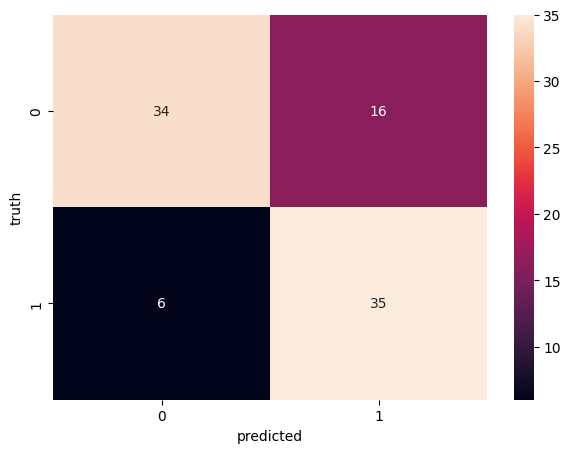

In [151]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

In [152]:
print("Classification report: \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        50
           1       0.69      0.85      0.76        41

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Threshold=0.6

In [153]:
print("LogisticRegression \nSplit 70:30 \nThreshold=0.6")
print("performance=",get_score(LogisticRegression(),X_train,X_test,y_train,y_test,0.6))

LogisticRegression 
Split 70:30 
Threshold=0.6
performance= 0.7252747252747253


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



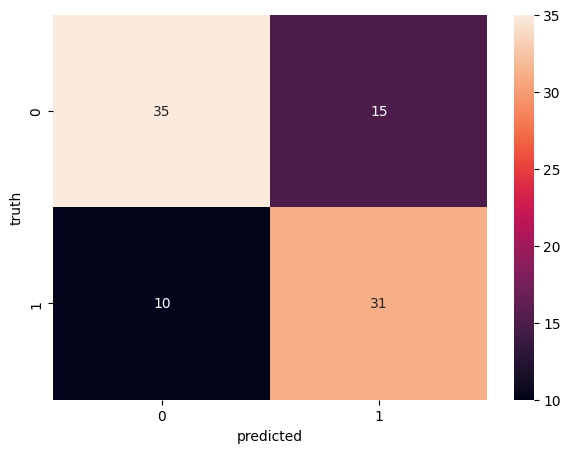

In [154]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

In [155]:
print("Classification report: \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.67      0.76      0.71        41

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Split 80:30

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [157]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold 0.5

In [158]:
print("LogisticRegression \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(LogisticRegression(),X_train,X_test,y_train,y_test,0.5))

LogisticRegression 
Split 80:20 
Threshold value = 0.5
performance= 0.7049180327868853


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



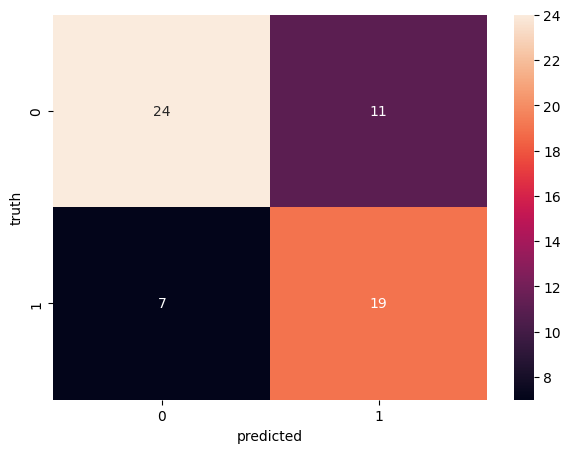

In [159]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

In [160]:
print("Classification report:  \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

Classification report:  

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        35
           1       0.63      0.73      0.68        26

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Threshold=0.6

In [161]:
print("LogisticRegression \nSplit 80:20 \nThreshold=0.6")
print("performance=",get_score(LogisticRegression(),X_train,X_test,y_train,y_test,0.6))

LogisticRegression 
Split 80:20 
Threshold=0.6
performance= 0.6721311475409836


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



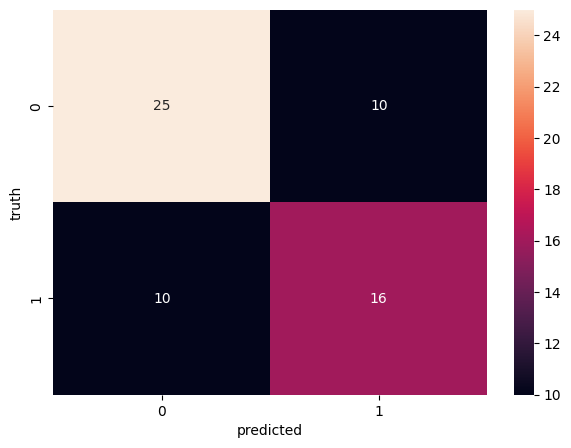

In [162]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

In [163]:
print("Classification report: \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.62      0.62      0.62        26

    accuracy                           0.67        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.67      0.67        61



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [164]:
roc_auc(LogisticRegression(),X,y)

C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [165]:
study(LogisticRegression(),X,y)

Most Dominated Feature= cp 

Rank 1 : cp , accuracy= 0.7049180327868853
Rank 2 : thalachh , accuracy= 0.6721311475409836
Rank 3 : oldpeak , accuracy= 0.6721311475409836
Rank 4 : caa , accuracy= 0.639344262295082
Rank 5 : trtbps , accuracy= 0.4918032786885246
Rank 6 : chol , accuracy= 0.45901639344262296
Rank 7 : age , accuracy= 0.45901639344262296


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.758242       0.725275       0.704918       0.672131
precision       0.686275       0.673913       0.633333       0.615385
recall          0.853659       0.756098       0.730769       0.615385
f1               0.76087       0.712644       0.678571       0.615385
roc_auc         0.766829       0.728049       0.708242       0.664835
mae             0.241758       0.274725       0.295082       0.327869
mse             0.241758       0.274725       0.295082       0.327869
rmse            0.491689       0.524142       0.543214       0.572598
r2              0.023415      -0.109756      -0.206593      -0.340659
confusion       [34, 16]       [35, 15]       [24, 11]       [25, 10]
matrix           [6, 35]       [10, 31]        [7, 19]       [10, 16]


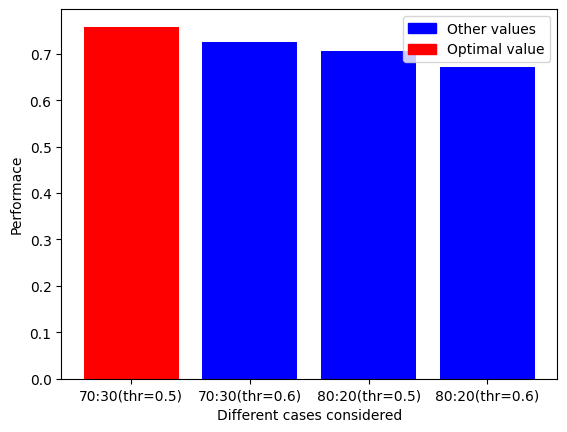

In [166]:
graph(LogisticRegression(),X,y)

SVM:

Split 70:30

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [168]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [169]:
from sklearn.svm import SVC
print("SVM \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(SVC(probability=True),X_train,X_test,y_train,y_test,0.5))

SVM 
Split 70:30 
Threshold value = 0.5
performance= 0.6483516483516484


Confusion matrix: 



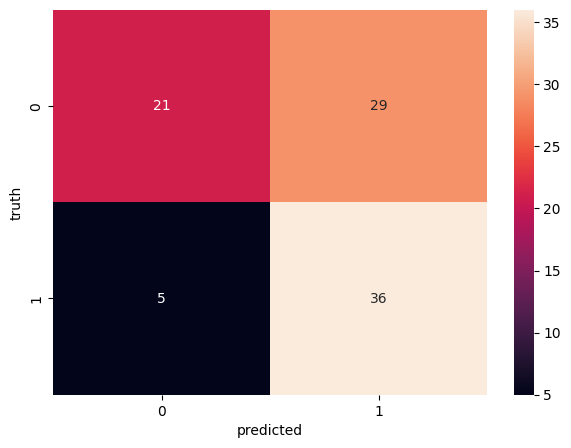

In [170]:
print("Confusion matrix: \n",)
conf_mat(SVC(probability=True),X_train,X_test,y_train,y_test,0.5)

In [171]:
print("Classification report: \n")
clasf_repo(SVC(probability=True),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.32      0.46        50
           1       0.52      0.90      0.66        41

    accuracy                           0.58        91
   macro avg       0.66      0.61      0.56        91
weighted avg       0.67      0.58      0.55        91



Threshold=0.6

In [172]:
print("SVM \nSplit 70:30 \nThreshold value = 0.6")
print("performance=",get_score(SVC(probability=True),X_train,X_test,y_train,y_test,0.6))

SVM 
Split 70:30 
Threshold value = 0.6
performance= 0.6703296703296703


Confusion matrix: 



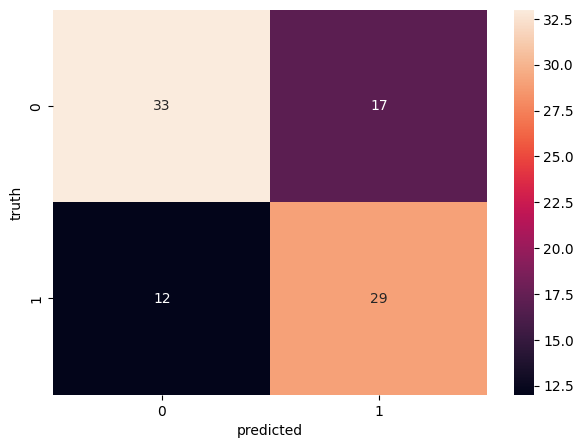

In [173]:
print("Confusion matrix: \n",)
conf_mat(SVC(probability=True),X_train,X_test,y_train,y_test,0.6)

In [174]:
print("Classification report: \n")
clasf_repo(SVC(probability=True),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.73      0.66      0.69        50
           1       0.63      0.71      0.67        41

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.69      0.68      0.68        91



Split 80:20

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [176]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold=0.5

In [177]:
print("SVM \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(SVC(probability=True),X_train,X_test,y_train,y_test,0.5))

SVM 
Split 80:20 
Threshold value = 0.5
performance= 0.6721311475409836


Confusion matrix: 



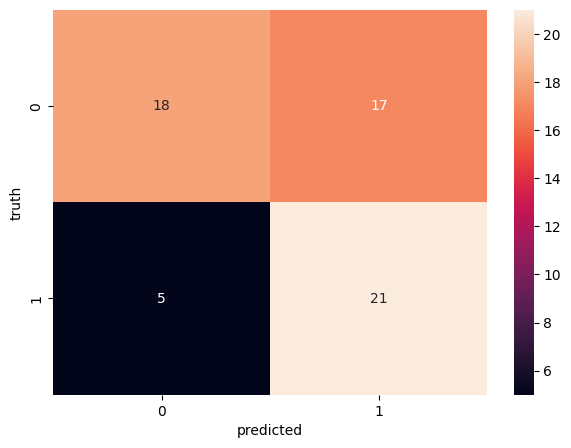

In [178]:
print("Confusion matrix: \n",)
conf_mat(SVC(probability=True),X_train,X_test,y_train,y_test,0.5)

In [179]:
print("Classification report: \n")
clasf_repo(SVC(probability=True),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.79      0.54      0.64        35
           1       0.57      0.81      0.67        26

    accuracy                           0.66        61
   macro avg       0.68      0.68      0.66        61
weighted avg       0.70      0.66      0.65        61



Threshold=0.6

In [180]:
print("SVM \nSplit 80:20 \nThreshold value = 0.6")
print("performance=",get_score(SVC(probability=True),X_train,X_test,y_train,y_test,0.6))

SVM 
Split 80:20 
Threshold value = 0.6
performance= 0.6885245901639344


Confusion matrix: 



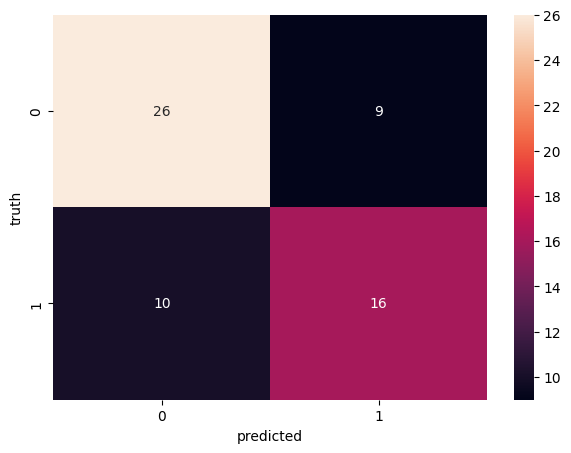

In [181]:
print("Confusion matrix: \n",)
conf_mat(SVC(probability=True),X_train,X_test,y_train,y_test,0.6)

In [182]:
print("Classification report: \n")
clasf_repo(SVC(probability=True),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.64      0.62      0.63        26

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



In [183]:
roc_auc(SVC(probability=True),X,y)

In [184]:
study(SVC(probability=True),X,y)

Most Dominated Feature= cp 

Rank 1 : cp , accuracy= 0.7049180327868853
Rank 2 : oldpeak , accuracy= 0.6721311475409836
Rank 3 : caa , accuracy= 0.6721311475409836
Rank 4 : thalachh , accuracy= 0.639344262295082
Rank 5 : age , accuracy= 0.6065573770491803
Rank 6 : trtbps , accuracy= 0.4262295081967213
Rank 7 : chol , accuracy= 0.4098360655737705


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.637363       0.681319       0.655738       0.704918
precision         0.5625       0.630435       0.567568       0.653846
recall          0.878049       0.707317       0.807692       0.653846
f1              0.685714       0.666667       0.666667       0.653846
roc_auc         0.659024       0.683659       0.675275       0.698352
mae             0.362637       0.318681       0.344262       0.295082
mse             0.362637       0.318681       0.344262       0.295082
rmse            0.602194       0.564519       0.586739       0.543214
r2             -0.464878      -0.287317      -0.407692      -0.206593
confusion       [22, 28]       [33, 17]       [19, 16]        [26, 9]
matrix           [5, 36]       [12, 29]        [5, 21]        [9, 17]


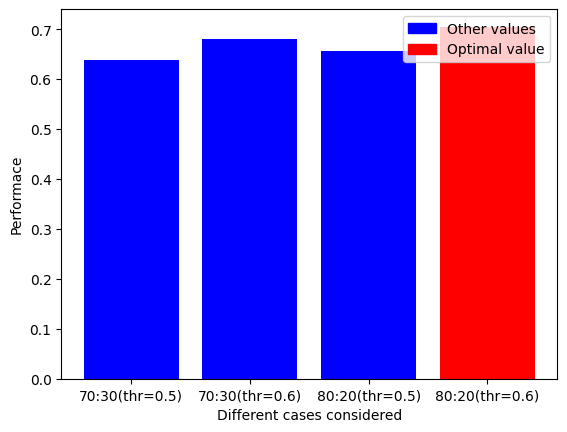

In [185]:
graph(SVC(probability=True),X,y)

Decision Tree:

Split 70:30

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [187]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [188]:
from sklearn.tree import DecisionTreeClassifier
print("DecisionTree \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.5))

DecisionTree 
Split 70:30 
Threshold value = 0.5
performance= 0.7802197802197802


Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



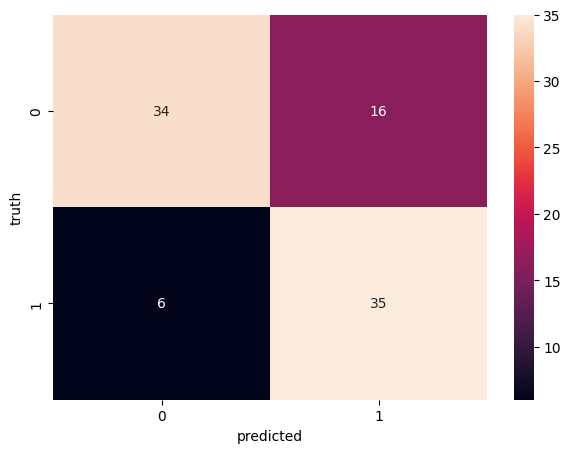

In [189]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

In [190]:
print("Classification report: \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        50
           1       0.69      0.85      0.76        41

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Threshold=0.6

In [191]:
print("LogisticRegression \nSplit 70:30 \nThreshold=0.6")
print("performance=",get_score(LogisticRegression(),X_train,X_test,y_train,y_test,0.6))

LogisticRegression 
Split 70:30 
Threshold=0.6
performance= 0.7252747252747253


C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion matrix: 



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



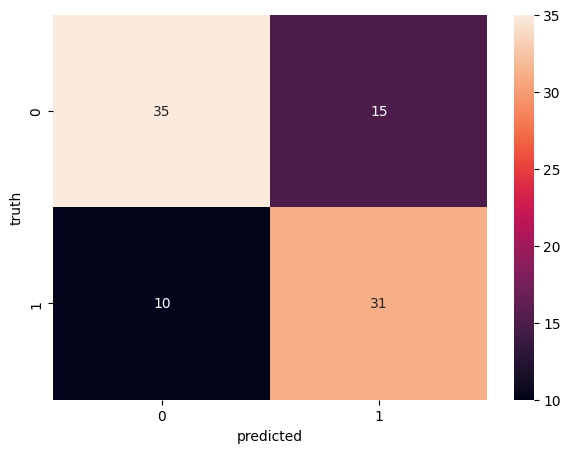

In [192]:
print("Confusion matrix: \n",)
conf_mat(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

In [193]:
print("Classification report: \n")
clasf_repo(LogisticRegression(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.67      0.76      0.71        41

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



C:\Users\mswat\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Split 80:30

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [195]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold 0.5

In [196]:
print("DecisionTree \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.5))

DecisionTree 
Split 80:20 
Threshold value = 0.5
performance= 0.7868852459016393


Confusion matrix: 



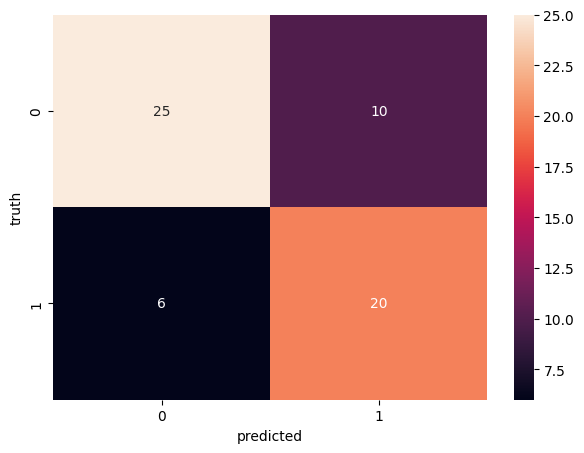

In [197]:
print("Confusion matrix: \n",)
conf_mat(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.5)

In [198]:
print("Classification report:  \n")
clasf_repo(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.5)

Classification report:  

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



Threshold=0.6

In [199]:
print("DecisionTree \nSplit 80:20 \nThreshold=0.6")
print("performance=",get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.6))

DecisionTree 
Split 80:20 
Threshold=0.6
performance= 0.7704918032786885


Confusion matrix: 



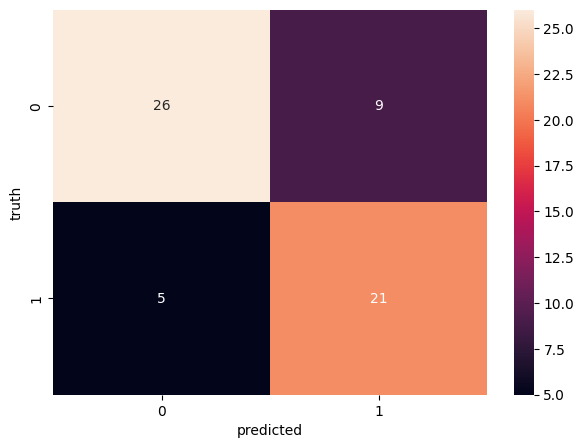

In [200]:
print("Confusion matrix: \n",)
conf_mat(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.6)

In [201]:
print("Classification report: \n")
clasf_repo(DecisionTreeClassifier(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [202]:
roc_auc(DecisionTreeClassifier(),X,y)

In [203]:
study(DecisionTreeClassifier(),X,y)

Most Dominated Feature= oldpeak 

Rank 1 : oldpeak , accuracy= 0.7540983606557377
Rank 2 : cp , accuracy= 0.7049180327868853
Rank 3 : caa , accuracy= 0.6721311475409836
Rank 4 : thalachh , accuracy= 0.639344262295082
Rank 5 : age , accuracy= 0.5737704918032787
Rank 6 : trtbps , accuracy= 0.4918032786885246
Rank 7 : chol , accuracy= 0.47540983606557374


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.736264       0.736264       0.770492       0.770492
precision       0.654545       0.654545            0.7            0.7
recall          0.878049       0.878049       0.807692       0.807692
f1                  0.75           0.75           0.75           0.75
roc_auc         0.749024       0.749024       0.775275       0.775275
mae             0.263736       0.263736       0.229508       0.229508
mse             0.263736       0.263736       0.229508       0.229508
rmse            0.513553       0.513553        0.47907        0.47907
r2             -0.065366      -0.065366       0.061538       0.061538
confusion       [31, 19]       [31, 19]        [26, 9]        [26, 9]
matrix           [5, 36]        [5, 36]        [5, 21]        [5, 21]


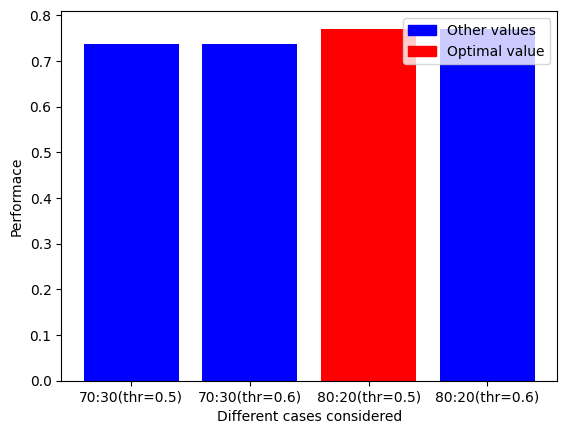

In [204]:
graph(DecisionTreeClassifier(),X,y)

Random Forest Classifier:

Split 70:30

In [205]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [206]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [207]:
from sklearn.ensemble import RandomForestClassifier
print("RandomForest \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5))

RandomForest 
Split 70:30 
Threshold value = 0.5
performance= 0.7692307692307693


Confusion matrix: 



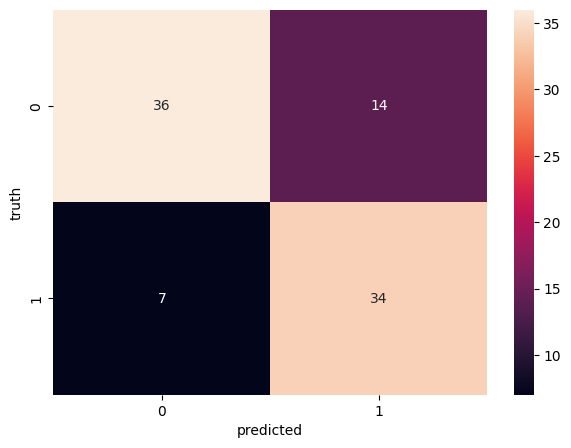

In [208]:
print("Confusion matrix: \n",)
conf_mat(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5)

In [209]:
print("Classification report: \n")
clasf_repo(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.71      0.88      0.78        41

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91



Threshold=0.6

In [210]:
print("RandomForestClassifier \nSplit 70:30 \nThreshold=0.6")
print("performance=",get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6))

RandomForestClassifier 
Split 70:30 
Threshold=0.6
performance= 0.7692307692307693


Confusion matrix: 



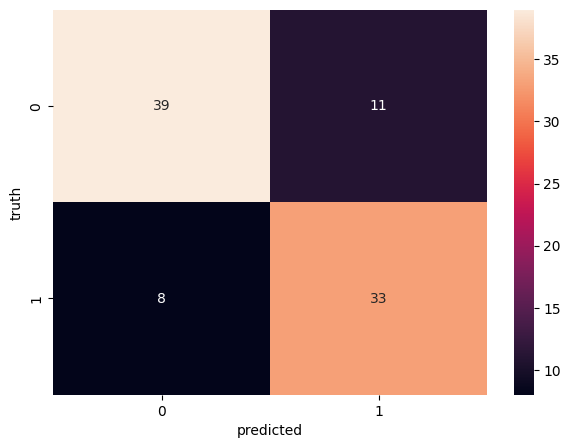

In [211]:
print("Confusion matrix: \n",)
conf_mat(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6)

In [212]:
print("Classification report: \n")
clasf_repo(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.73      0.78      0.75        41

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



Split 80:30

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [214]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold 0.5

In [215]:
print("RandomForestClassifier \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5))

RandomForestClassifier 
Split 80:20 
Threshold value = 0.5
performance= 0.7704918032786885


Confusion matrix: 



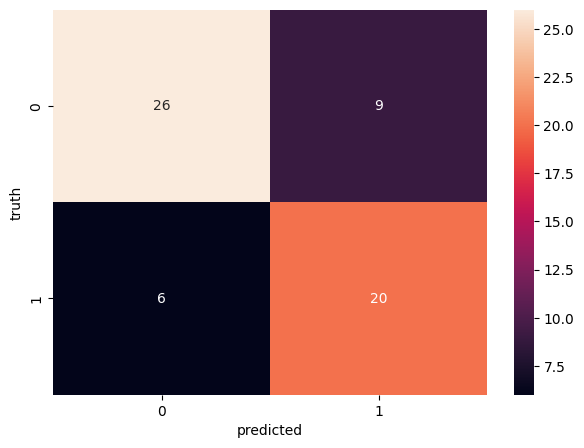

In [216]:
print("Confusion matrix: \n",)
conf_mat(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5)

In [217]:
print("Classification report:  \n")
clasf_repo(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.5)

Classification report:  

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



Threshold=0.6

In [218]:
print("RandomForestClassifier \nSplit 80:20 \nThreshold=0.6")
print("performance=",get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6))

RandomForestClassifier 
Split 80:20 
Threshold=0.6
performance= 0.7868852459016393


Confusion matrix: 



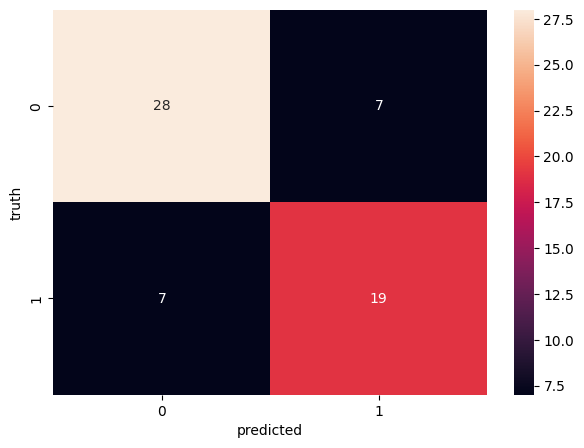

In [219]:
print("Confusion matrix: \n",)
conf_mat(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6)

In [220]:
print("Classification report: \n")
clasf_repo(RandomForestClassifier(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.74      0.77      0.75        26

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [221]:
roc_auc(RandomForestClassifier(),X,y)

In [222]:
study(RandomForestClassifier(),X,y)

Most Dominated Feature= oldpeak 

Rank 1 : oldpeak , accuracy= 0.7377049180327869
Rank 2 : cp , accuracy= 0.7049180327868853
Rank 3 : caa , accuracy= 0.6721311475409836
Rank 4 : thalachh , accuracy= 0.639344262295082
Rank 5 : age , accuracy= 0.5737704918032787
Rank 6 : trtbps , accuracy= 0.5245901639344263
Rank 7 : chol , accuracy= 0.4918032786885246


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.791209       0.758242       0.803279       0.770492
precision           0.72       0.702128        0.71875       0.730769
recall          0.878049       0.804878       0.884615       0.730769
f1              0.791209           0.75       0.793103       0.730769
roc_auc         0.799024       0.762439       0.813736       0.765385
mae             0.208791       0.241758       0.196721       0.229508
mse             0.208791       0.241758       0.196721       0.229508
rmse            0.456937       0.491689       0.443533        0.47907
r2              0.156585       0.023415       0.195604       0.061538
confusion       [36, 14]       [36, 14]        [26, 9]        [28, 7]
matrix           [5, 36]        [8, 33]        [3, 23]        [7, 19]


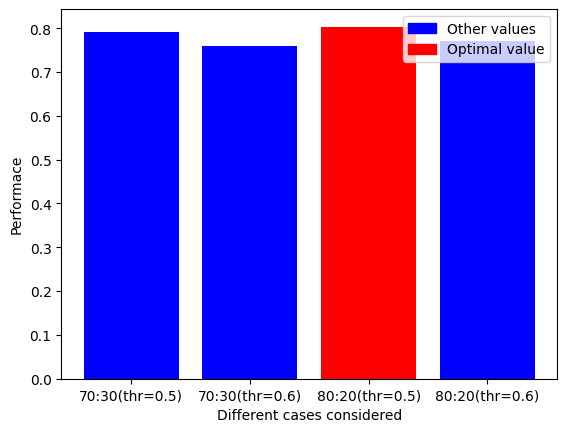

In [223]:
graph(RandomForestClassifier(),X,y)

Naivebayes:

Split 70:30

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [225]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [226]:
from sklearn.naive_bayes import GaussianNB
print("NaiveBayes \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(GaussianNB(),X_train,X_test,y_train,y_test,0.5))

NaiveBayes 
Split 70:30 
Threshold value = 0.5
performance= 0.7582417582417582


Confusion matrix: 



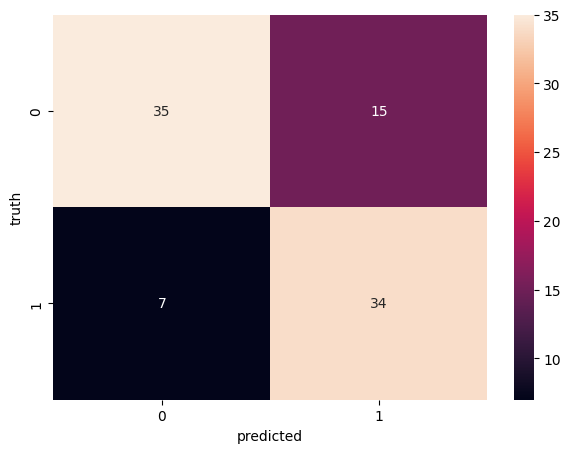

In [227]:
print("Confusion matrix: \n",)
conf_mat(GaussianNB(),X_train,X_test,y_train,y_test,0.5)

In [228]:
print("Classification report: \n")
clasf_repo(GaussianNB(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        50
           1       0.69      0.83      0.76        41

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



Threshold=0.6

In [229]:
print("NaiveBayes \nSplit 70:30 \nThreshold value = 0.6")
print("performance=",get_score(GaussianNB(),X_train,X_test,y_train,y_test,0.6))

NaiveBayes 
Split 70:30 
Threshold value = 0.6
performance= 0.7472527472527473


Confusion matrix: 



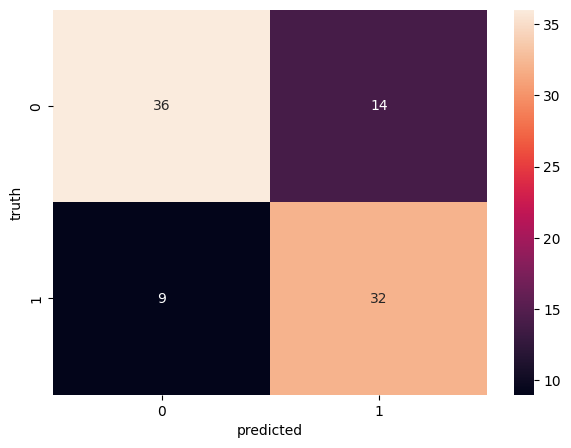

In [230]:
print("Confusion matrix: \n",)
conf_mat(GaussianNB(),X_train,X_test,y_train,y_test,0.6)

In [231]:
print("Classification report: \n")
clasf_repo(GaussianNB(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.70      0.78      0.74        41

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



Split 80:20

In [232]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [233]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold=0.5

In [234]:
print("NaiveBayes \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(GaussianNB(),X_train,X_test,y_train,y_test,0.5))

NaiveBayes 
Split 80:20 
Threshold value = 0.5
performance= 0.7540983606557377


Confusion matrix: 



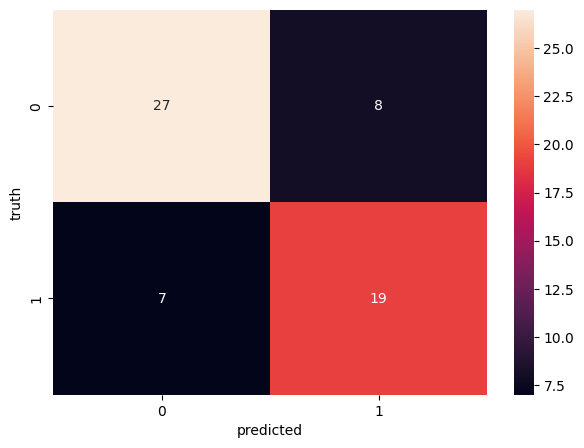

In [235]:
print("Confusion matrix: \n",)
conf_mat(GaussianNB(),X_train,X_test,y_train,y_test,0.5)

In [236]:
print("Classification report: \n")
clasf_repo(GaussianNB(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.70      0.73      0.72        26

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Threshold=0.6

In [237]:
print("NaiveBayes \nSplit 80:20 \nThreshold value = 0.6")
print("performance=",get_score(GaussianNB(),X_train,X_test,y_train,y_test,0.6))

NaiveBayes 
Split 80:20 
Threshold value = 0.6
performance= 0.7377049180327869


Confusion matrix: 



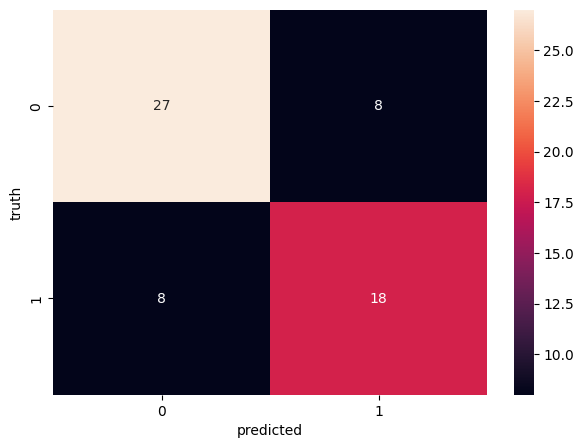

In [238]:
print("Confusion matrix: \n",)
conf_mat(GaussianNB(),X_train,X_test,y_train,y_test,0.6)

In [239]:
print("Classification report: \n")
clasf_repo(GaussianNB(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        35
           1       0.69      0.69      0.69        26

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [240]:
roc_auc(GaussianNB(),X,y)

In [241]:
study(GaussianNB(),X,y)

Most Dominated Feature= oldpeak 

Rank 1 : oldpeak , accuracy= 0.7049180327868853
Rank 2 : cp , accuracy= 0.7049180327868853
Rank 3 : thalachh , accuracy= 0.6229508196721312
Rank 4 : age , accuracy= 0.5737704918032787
Rank 5 : caa , accuracy= 0.5245901639344263
Rank 6 : trtbps , accuracy= 0.4918032786885246
Rank 7 : chol , accuracy= 0.4262295081967213


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.758242       0.747253       0.754098       0.737705
precision       0.693878       0.695652       0.703704       0.692308
recall          0.829268       0.780488       0.730769       0.692308
f1              0.755556       0.735632       0.716981       0.692308
roc_auc         0.764634       0.750244       0.751099       0.731868
mae             0.241758       0.252747       0.245902       0.262295
mse             0.241758       0.252747       0.245902       0.262295
rmse            0.491689        0.50274       0.495885       0.512148
r2              0.023415      -0.020976      -0.005495      -0.072527
confusion       [35, 15]       [36, 14]        [27, 8]        [27, 8]
matrix           [7, 34]        [9, 32]        [7, 19]        [8, 18]


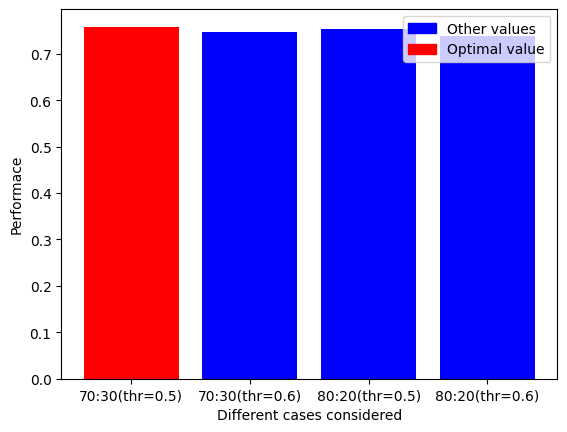

In [242]:
graph(GaussianNB(),X,y)

KNN:

Split 70:30

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [244]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [245]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5))

KNN 
Split 70:30 
Threshold value = 0.5
performance= 0.6373626373626373


Confusion matrix: 



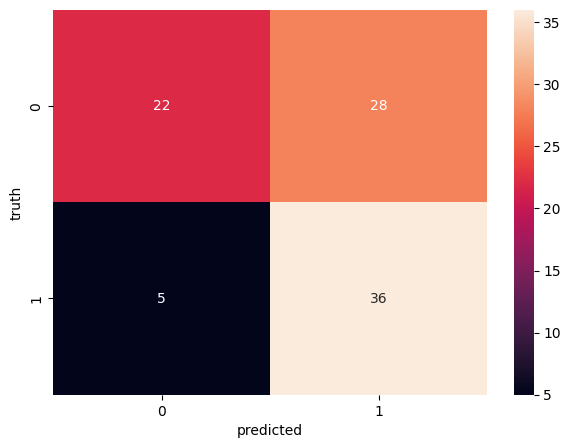

In [246]:
print("Confusion matrix: \n",)
conf_mat(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5)

In [247]:
print("Classification report: \n")
clasf_repo(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.44      0.57        50
           1       0.56      0.88      0.69        41

    accuracy                           0.64        91
   macro avg       0.69      0.66      0.63        91
weighted avg       0.70      0.64      0.62        91



Threshold=0.6

In [248]:
print("KNN \nSplit 70:30 \nThreshold value = 0.6")
print("performance=",get_score(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6))

KNN 
Split 70:30 
Threshold value = 0.6
performance= 0.6373626373626373


Confusion matrix: 



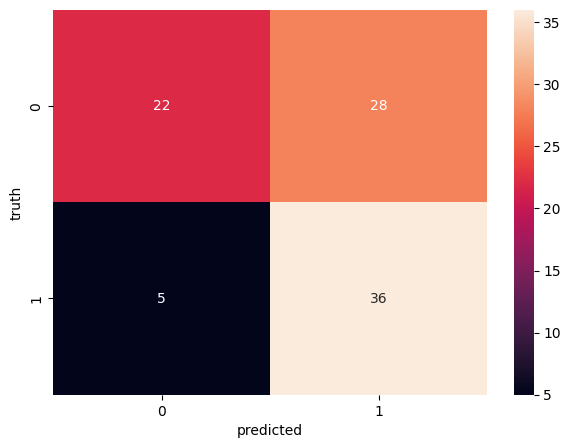

In [249]:
print("Confusion matrix: \n",)
conf_mat(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6)

In [250]:
print("Classification report: \n")
clasf_repo(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.44      0.57        50
           1       0.56      0.88      0.69        41

    accuracy                           0.64        91
   macro avg       0.69      0.66      0.63        91
weighted avg       0.70      0.64      0.62        91



Split 80:20

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [252]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold=0.5

In [253]:
print("KNN \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5))

KNN 
Split 80:20 
Threshold value = 0.5
performance= 0.5901639344262295


Confusion matrix: 



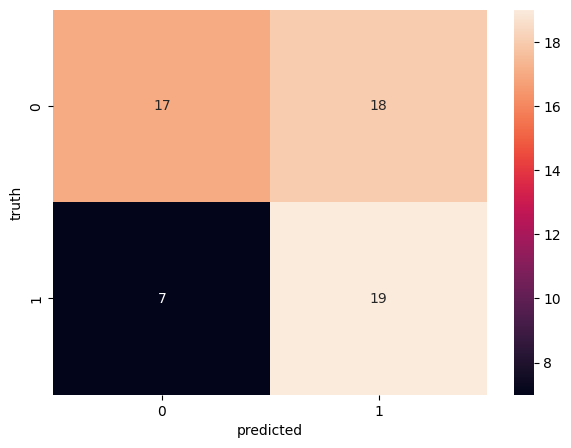

In [254]:
print("Confusion matrix: \n",)
conf_mat(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5)

In [255]:
print("Classification report: \n")
clasf_repo(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.71      0.49      0.58        35
           1       0.51      0.73      0.60        26

    accuracy                           0.59        61
   macro avg       0.61      0.61      0.59        61
weighted avg       0.63      0.59      0.59        61



Threshold=0.6

In [256]:
print("KNN \nSplit 80:20 \nThreshold value = 0.6")
print("performance=",get_score(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6))

KNN 
Split 80:20 
Threshold value = 0.6
performance= 0.5901639344262295


Confusion matrix: 



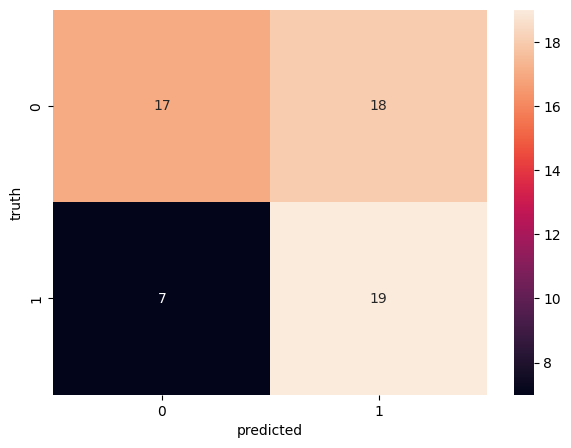

In [257]:
print("Confusion matrix: \n",)
conf_mat(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6)

In [258]:
print("Classification report: \n")
clasf_repo(KNeighborsClassifier(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.71      0.49      0.58        35
           1       0.51      0.73      0.60        26

    accuracy                           0.59        61
   macro avg       0.61      0.61      0.59        61
weighted avg       0.63      0.59      0.59        61



In [259]:
roc_auc(KNeighborsClassifier(),X,y)

In [260]:
study(KNeighborsClassifier(),X,y)

Most Dominated Feature= oldpeak 

Rank 1 : oldpeak , accuracy= 0.7540983606557377
Rank 2 : thalachh , accuracy= 0.7049180327868853
Rank 3 : cp , accuracy= 0.6885245901639344
Rank 4 : caa , accuracy= 0.639344262295082
Rank 5 : age , accuracy= 0.5573770491803278
Rank 6 : chol , accuracy= 0.5409836065573771
Rank 7 : trtbps , accuracy= 0.4918032786885246


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.637363       0.637363       0.590164       0.590164
precision         0.5625         0.5625       0.513514       0.513514
recall          0.878049       0.878049       0.730769       0.730769
f1              0.685714       0.685714       0.603175       0.603175
roc_auc         0.659024       0.659024       0.608242       0.608242
mae             0.362637       0.362637       0.409836       0.409836
mse             0.362637       0.362637       0.409836       0.409836
rmse            0.602194       0.602194       0.640184       0.640184
r2             -0.464878      -0.464878      -0.675824      -0.675824
confusion       [22, 28]       [22, 28]       [17, 18]       [17, 18]
matrix           [5, 36]        [5, 36]        [7, 19]        [7, 19]


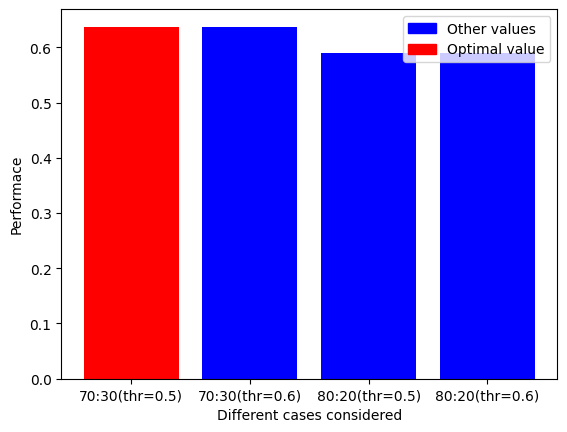

In [261]:
graph(KNeighborsClassifier(),X,y)

LDA

Split 70:30

In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [263]:
print_shape('70:30',X_train,X_test,y_train,y_test)

For 70:30 ratio split:
X_train= (212, 7)
X_test= (91, 7)
y_train= (212,)
y_test= (91,)


Threshold=0.5

In [264]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print("LDA \nSplit 70:30 \nThreshold value = 0.5")
print("performance=",get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5))

LDA 
Split 70:30 
Threshold value = 0.5
performance= 0.7582417582417582


Confusion matrix: 



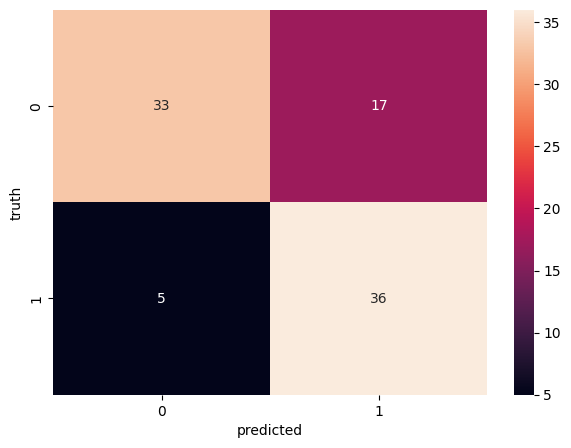

In [265]:
print("Confusion matrix: \n",)
conf_mat(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5)

In [266]:
print("Classification report: \n")
clasf_repo(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.66      0.75        50
           1       0.68      0.88      0.77        41

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



Threshold=0.6

In [267]:
print("LDA \nSplit 70:30 \nThreshold value = 0.6")
print("performance=",get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6))

LDA 
Split 70:30 
Threshold value = 0.6
performance= 0.7362637362637363


Confusion matrix: 



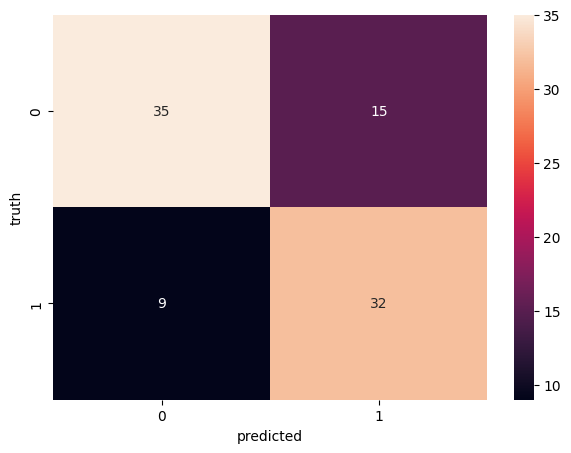

In [268]:
print("Confusion matrix: \n",)
conf_mat(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6)

In [269]:
print("Classification report: \n")
clasf_repo(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        50
           1       0.68      0.78      0.73        41

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



Split 80:20

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

In [271]:
print_shape('80:20',X_train,X_test,y_train,y_test)

For 80:20 ratio split:
X_train= (242, 7)
X_test= (61, 7)
y_train= (242,)
y_test= (61,)


Threshold=0.5

In [272]:
print("LDA \nSplit 80:20 \nThreshold value = 0.5")
print("performance=",get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5))

LDA 
Split 80:20 
Threshold value = 0.5
performance= 0.7213114754098361


Confusion matrix: 



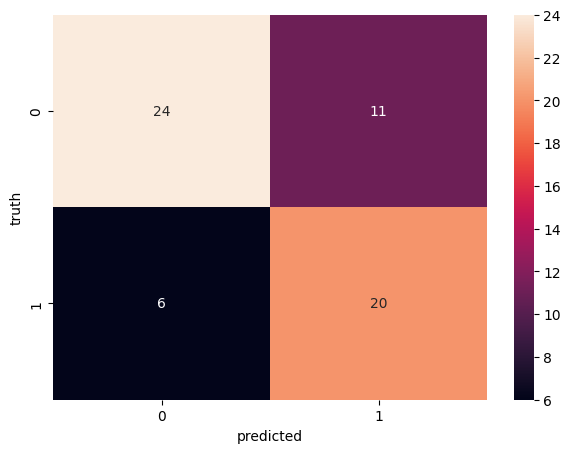

In [273]:
print("Confusion matrix: \n",)
conf_mat(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5)

In [274]:
print("Classification report: \n")
clasf_repo(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.5)

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.65      0.77      0.70        26

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61



Threshold=0.6

In [275]:
print("LDA \nSplit 80:20 \nThreshold value = 0.6")
print("performance=",get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6))

LDA 
Split 80:20 
Threshold value = 0.6
performance= 0.6885245901639344


Confusion matrix: 



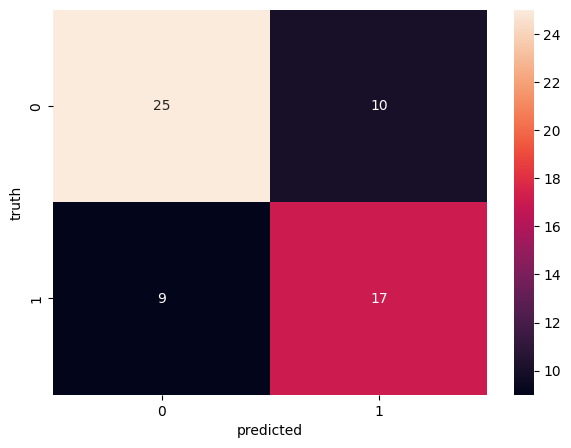

In [276]:
print("Confusion matrix: \n",)
conf_mat(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6)

In [277]:
print("Classification report: \n")
clasf_repo(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test,0.6)

Classification report: 

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.63      0.65      0.64        26

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



In [278]:
roc_auc(LinearDiscriminantAnalysis(),X,y)

In [279]:
study(LinearDiscriminantAnalysis(),X,y)

Most Dominated Feature= cp 

Rank 1 : cp , accuracy= 0.7049180327868853
Rank 2 : thalachh , accuracy= 0.6721311475409836
Rank 3 : oldpeak , accuracy= 0.6721311475409836
Rank 4 : caa , accuracy= 0.5245901639344263
Rank 5 : trtbps , accuracy= 0.4918032786885246
Rank 6 : chol , accuracy= 0.45901639344262296
Rank 7 : age , accuracy= 0.45901639344262296


          70:30(thr=0.5) 70:30(thr=0.6) 80:20(thr=0.5) 80:20(thr=0.6)
accuracy        0.758242       0.736264       0.721311       0.688525
precision       0.679245       0.680851       0.645161        0.62963
recall          0.878049       0.780488       0.769231       0.653846
f1              0.765957       0.727273       0.701754       0.641509
roc_auc         0.769024       0.740244       0.727473       0.684066
mae             0.241758       0.263736       0.278689       0.311475
mse             0.241758       0.263736       0.278689       0.311475
rmse            0.491689       0.513553        0.52791         0.5581
r2              0.023415      -0.065366       -0.13956      -0.273626
confusion       [33, 17]       [35, 15]       [24, 11]       [25, 10]
matrix           [5, 36]        [9, 32]        [6, 20]        [9, 17]


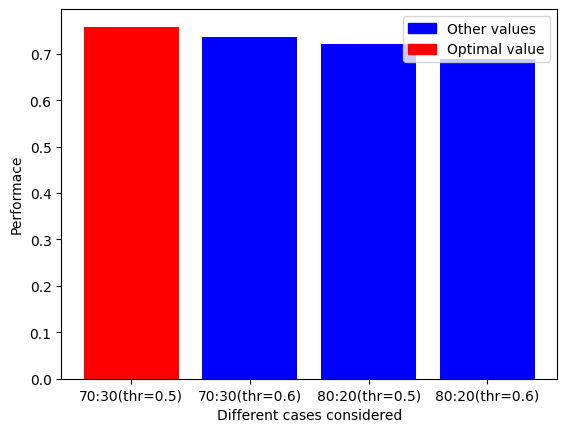

In [280]:
graph(LinearDiscriminantAnalysis(),X,y)